In [54]:
'''
GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 
클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성
하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 
속성에 저장된다.
'''

import numpy as np
import pandas as pd
# 추세 그래프 및 통계용 차트를 제공하는  시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt
# os : 환경설정 패키지
import os
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pylab as plt
import matplotlib as mpl

# sklearn.tree 의 DecisonTreeClassifier:분류 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
# graphviz import: 의사결정 나무 모델 시각화 .dot 확장자 파일 불러오는 패키지
import graphviz
from sklearn.model_selection import train_test_split


In [55]:
ds_health = pd.read_csv("../../실습화일/유방암.csv",engine ="python",encoding = 'euc-kr')
ds_health.head()

diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry           ...             worst radius  worst texture  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   worst perimeter  worst area  worst smoothness  worst compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   worst concavity  worst concave points  worst symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [56]:

#get_dummies : 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_health_dummy = pd.get_dummies(ds_health)
#더미변수 생성된 데이터의 상위 5개 row를 확인
ds_health_dummy.head()

diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry           ...             worst radius  worst texture  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   worst perimeter  worst area  worst smoothness  worst compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   worst concavity  worst concave points  worst symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [57]:
#dummy 변수로부터 변수 역할 지정
ds_health_y = ds_health_dummy["diagnosis"]
ds_health_x = ds_hmeq_dummy.drop("diagnosis", axis = 1, inplace = False)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터비율, random_state : 랜덤)
ds_hmeq_train_x, ds_hmeq_test_x, ds_hmeq_train_y, ds_hmeq_test_y =\
train_test_split(ds_hmeq_x, ds_hmeq_y, test_size = 0.30, random_state = 1234)

# train data 와 test data의 크기 
print("train data X size : {}".format(ds_health_train_x.shape))
print("train data Y size : {}".format(ds_health_train_y.shape))
print("test data X size : {}".format(ds_health_test_x.shape))
print("test data Y size : {}".format(ds_health_test_y.shape))

train data X size : (385, 30)
train data Y size : (385,)
test data X size : (184, 30)
test data Y size : (184,)


라이브러리 split 을 이용하여 70%와 30%로 나누어 분리하였다.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth': np.arange(3, 10)}

#gridSearchCV를 이용하여 의사결정트리
crit = ['gini','entropy']
for atom in crit:
    tree = GridSearchCV(DecisionTreeClassifier(criterion=atom), param_grid)
    tree.fit(ds_health_train_x, ds_health_train_y)
    tree_preds = tree.predict_proba(ds_health_test_x)[:, 1]
    tree_performance = roc_auc_score(ds_health_test_y, tree_preds)
    print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.9201171875
DecisionTree: Area under the ROC curve = 0.9748046875


param_grid에 범위가 3~9까지 각각의 max_depth에 마다 gini, entropy 방식으로 의사결정트리를 만들고
그 가운데 최적의 트리를 만들어주는것이 GridSearchCV의 기능이다.
이렇게 나온 의사결정트리는 best_estimator를 이용하여 fit하고 graphviz로 그려보았다

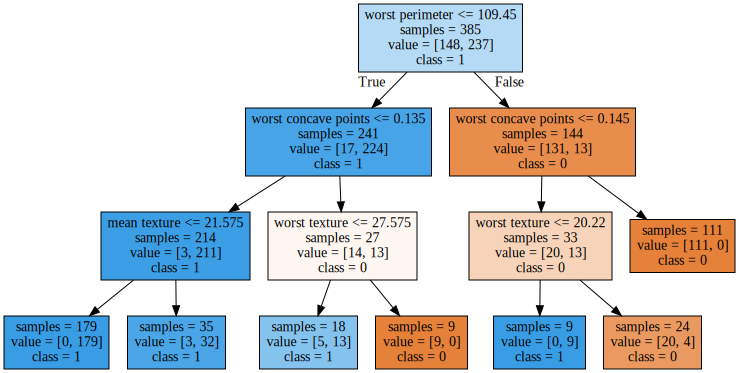

In [71]:
#graphviz 패키지로 트리 모델 시각화
tree.best_estimator_.fit(ds_health_train_x, ds_health_train_y)
export_graphviz(tree.best_estimator_, out_file = "tree.dot", class_names=["0","1"], feature_names = ds_hmeq_train_x.columns, impurity=False, filled = True)

os.environ["PATH"]+= os.pathsep + "./.wine/drive_c/Program Files (x86)/Graphviz2.38/bin/"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

위와같이 의사결정트리 모델을 시각화하였다.
해석은 노드에서 samples는 해당 노드의 전체 자료 수이고 value는 0과 1의 각각의 자료 수, 순수 노드가 아닐 경우에는 자료수가 많은 쪽으로 class를 분류했다.
부모 노드에서 worst perimeter가 109.45보다 작거나 같으면 True, 크면 False로 분류한다. 이때 모든 노드는 동일하게 방향이 적용된다.